# Onlin Retail Sales Exploratory Data Analysis


Import required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot  as plt 
import numpy as np 
from ipywidgets import interact

Load data set

In [2]:
df = pd.read_excel("C:\\Users\\Admin\\Desktop\\Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Cleaning


Check null values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Mathematical equetions of numerical columns

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


Rows have negative quantity

In [8]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Drop Rows which have quantity less than zero

In [9]:
df = df.drop(df[df['Quantity'] <= 0].index)

In [10]:
df.reset_index()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


--Check Row which have less than zero unit price

In [11]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


Drop rows which have unitprice less than zero

In [14]:
df = df.drop(df[df['UnitPrice'] <= 0].index)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


Relation between Unit Price and Quantity

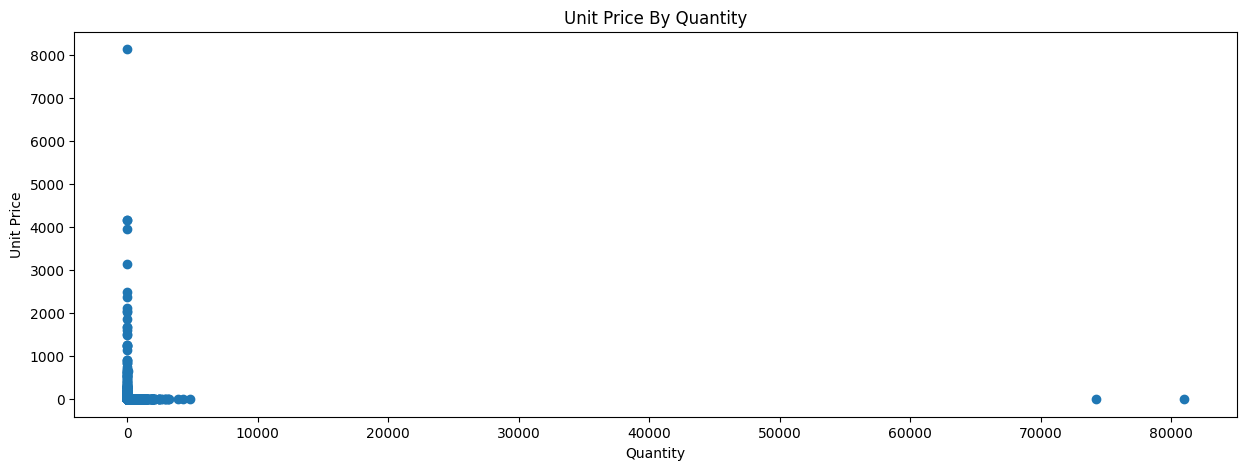

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(df['Quantity'].values,df['UnitPrice'].values)
plt.title('Unit Price By Quantity')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

Drop Rows which have quantities is more than 3500

In [17]:
df.shape

(397884, 8)

In [18]:
df = df.drop(df[df['Quantity'] > 3500].index)

Drop Rows which have Unit price is more than 3500

In [19]:
df.shape

(397879, 8)

In [20]:
df = df.drop(df[df['UnitPrice'] > 3500].index)

Make new column which represent Revenue

In [3]:
df['Revenue'] = df['Quantity']*df['UnitPrice']

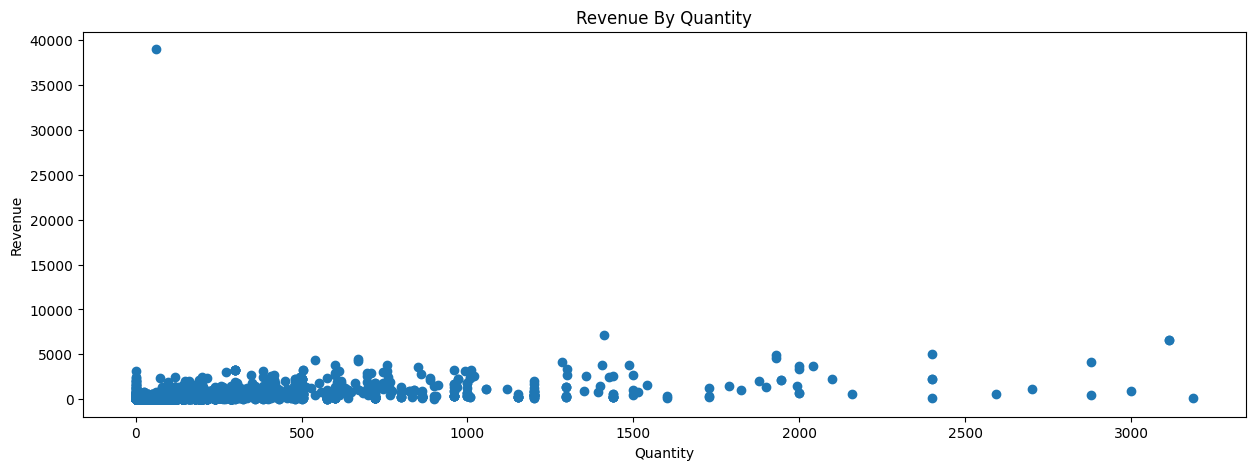

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(df['Quantity'].values,df['Revenue'].values)
plt.title('Revenue By Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

Drop Rows which have revenue is more than 30000

In [23]:
df = df.drop(df[df['Revenue'] > 30000].index)

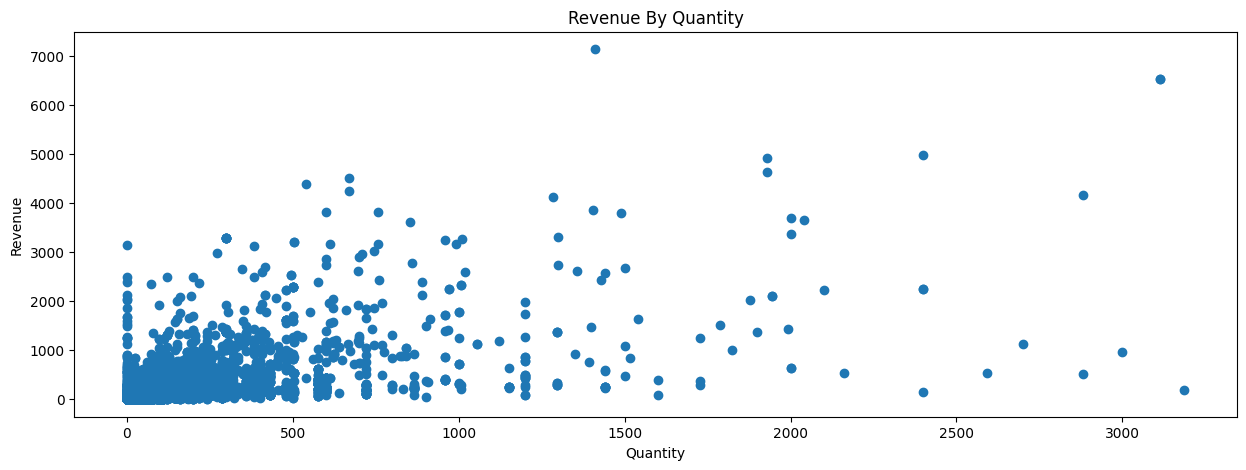

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(df['Quantity'].values,df['Revenue'].values)
plt.title('Revenue By Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

In [25]:
df.shape

(397874, 9)

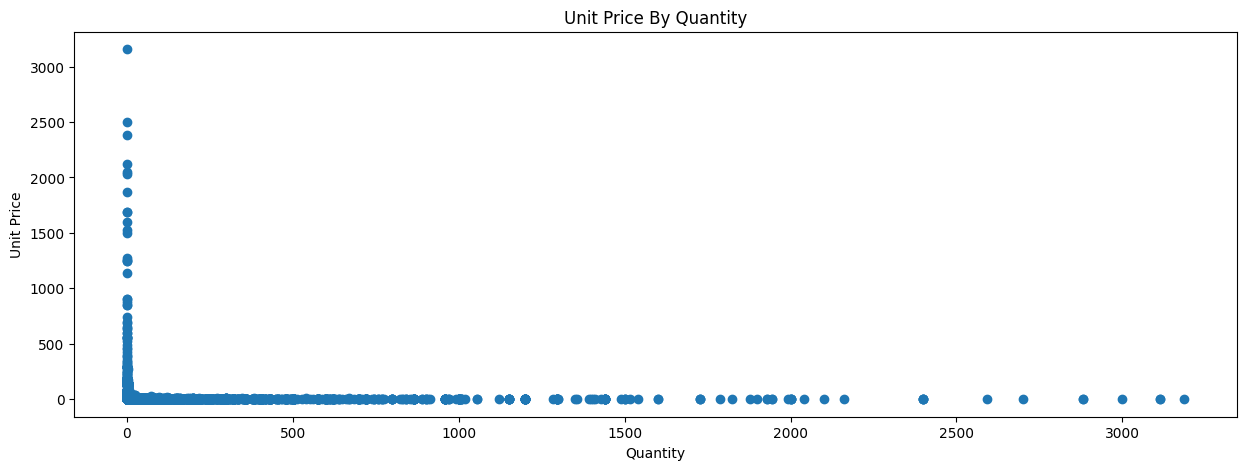

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(df['Quantity'].values,df['UnitPrice'].values)
plt.title('Unit Price By Quantity')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Devide Invoice Date column into two columns the name of date and time

In [28]:
df['InvoiceDate'] = df['InvoiceDate'].astype(str)

In [29]:
IV = df['InvoiceDate'].values
Date = []
Time = []
for i in IV:
    p = i.split(" ")
    Date.append(p[0])
    Time.append(p[1])
df['Date'] = Date
df['Time'] = Time
df.drop('InvoiceDate',inplace=True,axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00


Remove duplicate Rows 

In [30]:
df.duplicated().sum()

5192

In [31]:
df = df.drop_duplicates()

# Data Exploration and Feature Engineering

In [32]:
df.to_csv('Clean_Online_retail.csv')

In [33]:
df.Country.value_counts(normalize=True).mul(100).round(1).astype(str)+"%"

Country
United Kingdom          88.9%
Germany                  2.3%
France                   2.1%
EIRE                     1.8%
Spain                    0.6%
Netherlands              0.6%
Belgium                  0.5%
Switzerland              0.5%
Portugal                 0.4%
Australia                0.3%
Norway                   0.3%
Italy                    0.2%
Channel Islands          0.2%
Finland                  0.2%
Cyprus                   0.2%
Sweden                   0.1%
Austria                  0.1%
Denmark                  0.1%
Poland                   0.1%
Japan                    0.1%
Israel                   0.1%
Unspecified              0.1%
Singapore                0.1%
Iceland                  0.0%
USA                      0.0%
Canada                   0.0%
Greece                   0.0%
Malta                    0.0%
United Arab Emirates     0.0%
European Community       0.0%
RSA                      0.0%
Lebanon                  0.0%
Lithuania                0.0%
Br

In [34]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,392682.000000,392682.000000,392682.000000,392682.000000
mean,12.691496,3.072341,15287.871929,21.836663
std,41.381864,14.043294,1713.523942,71.797520
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.400000
75%,12.000000,3.750000,16791.000000,19.800000
max,3186.000000,3155.950000,18287.000000,7144.720000


Unit Price By Quantity in UK

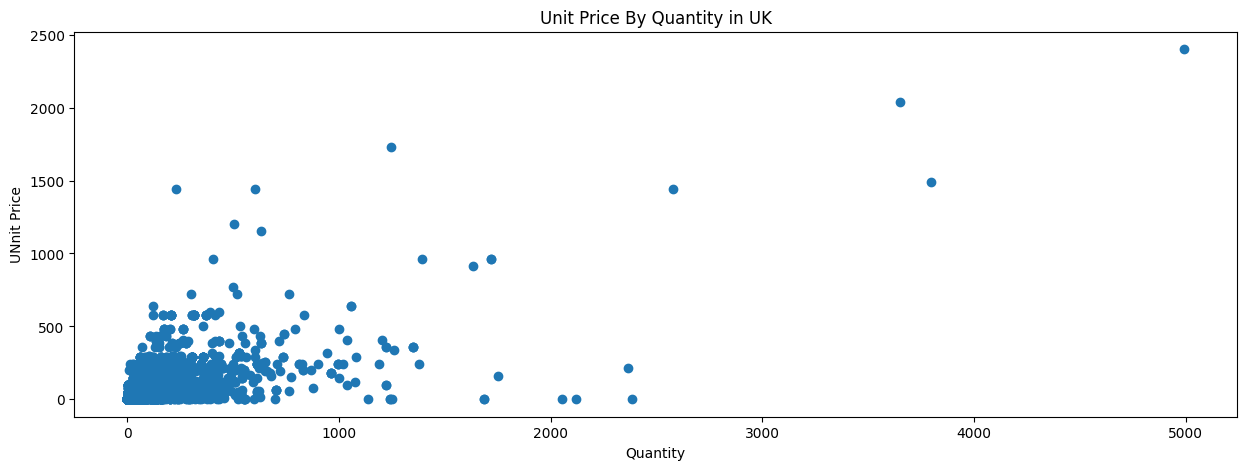

In [35]:
plt.figure(figsize=(15,5))
plt.scatter(list(df[df['Country'] != 'United Kingdom']['Revenue']),list(df[df['Country'] != 'United Kingdom']['Quantity']))
plt.title('Unit Price By Quantity in UK')
plt.xlabel('Quantity')
plt.ylabel('UNnit Price')
plt.show()

Product Demand

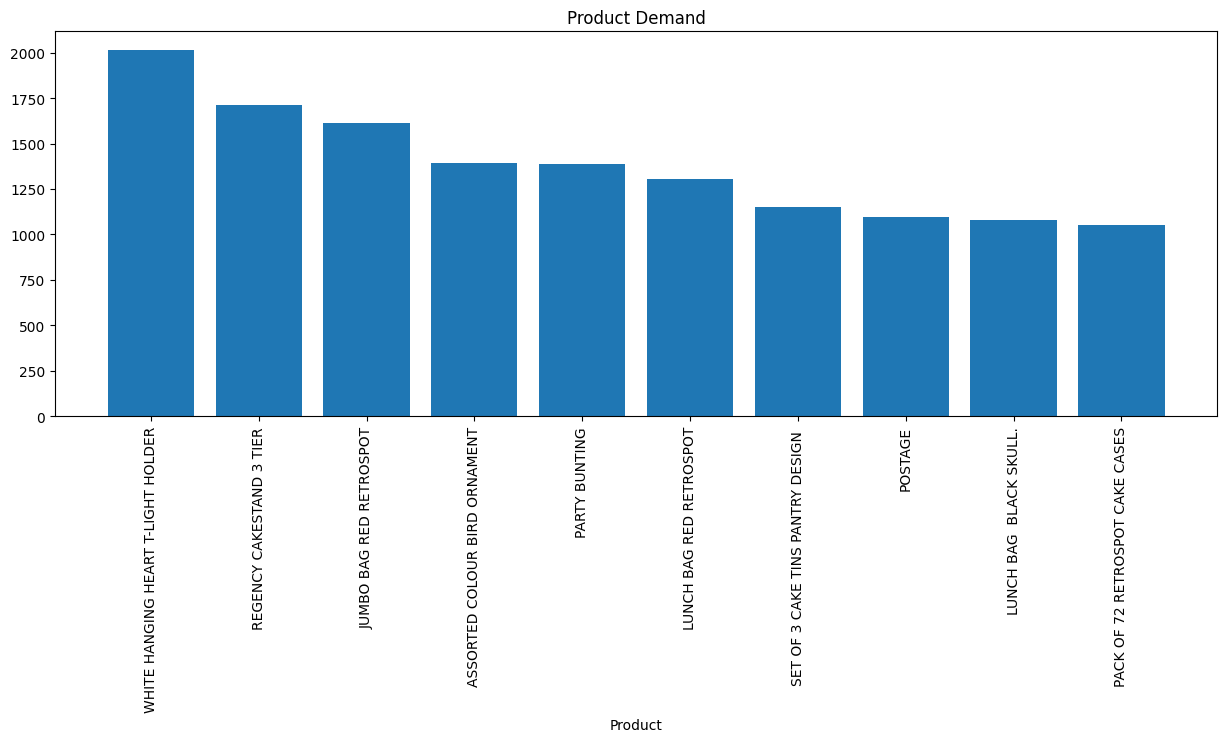

In [36]:
plt.figure(figsize=(15,5))
plt.bar(list(df['Description'].value_counts().head(10).keys()),list(df['Description'].value_counts().head(10)))
plt.title('Product Demand')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

In [37]:
df['Description'].nunique()

3876

In [38]:
df['StockCode'].nunique()

3664

In [39]:
df[df['Description'] == 'Manual']

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,Date,Time
2239,536569,M,Manual,1,1.25,16274.0,United Kingdom,1.25,2010-12-01,15:35:00
2250,536569,M,Manual,1,18.95,16274.0,United Kingdom,18.95,2010-12-01,15:35:00
6798,536981,M,Manual,2,0.85,14723.0,United Kingdom,1.70,2010-12-03,14:26:00
7976,537077,M,Manual,12,0.42,17062.0,United Kingdom,5.04,2010-12-05,11:59:00
8530,537137,M,Manual,36,0.85,16327.0,United Kingdom,30.60,2010-12-05,12:43:00
...,...,...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,219.50,17857.0,United Kingdom,219.50,2011-12-05,13:11:00
526018,580646,M,Manual,800,0.25,17857.0,United Kingdom,200.00,2011-12-05,13:13:00
530876,580884,M,Manual,1,0.85,15907.0,United Kingdom,0.85,2011-12-06,12:21:00
531432,580956,M,Manual,4,1.25,17841.0,United Kingdom,5.00,2011-12-06,14:23:00


In [40]:
df.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,Date,Time
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
392677,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00
392678,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00
392679,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00
392680,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00


change data type of stock code from int to str

In [41]:
df['StockCode'] = df['StockCode'].astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_54552\2678754683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = df['StockCode'].astype(str)


Product Demand

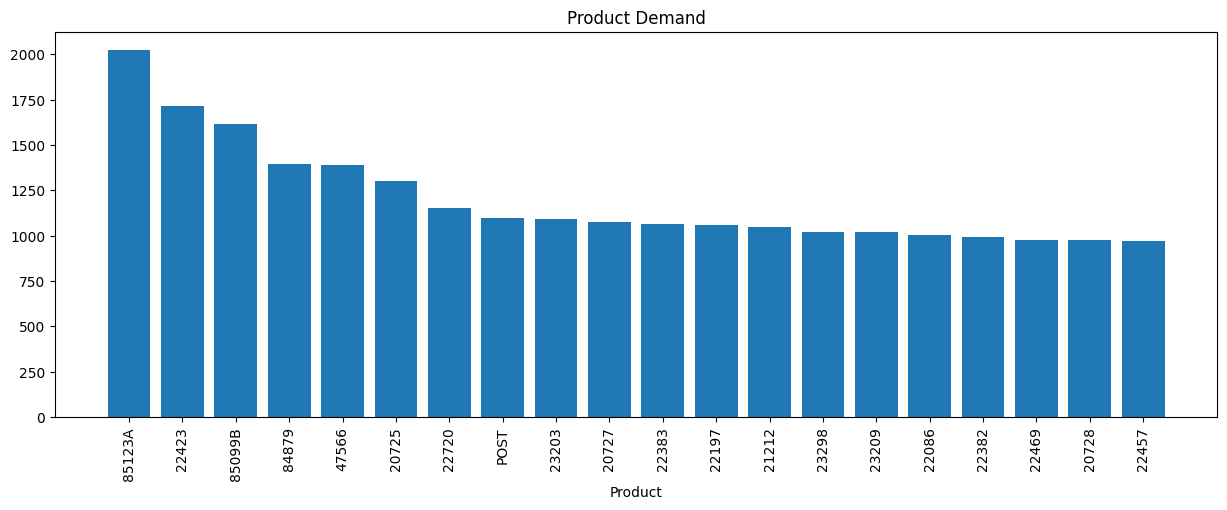

In [42]:
plt.figure(figsize=(15,5))
plt.bar(list(df['StockCode'].value_counts().head(20).keys()),list(df['StockCode'].value_counts().head(20)))
plt.title('Product Demand')

plt.xlabel('Product')

plt.xticks(rotation=90)
plt.show()

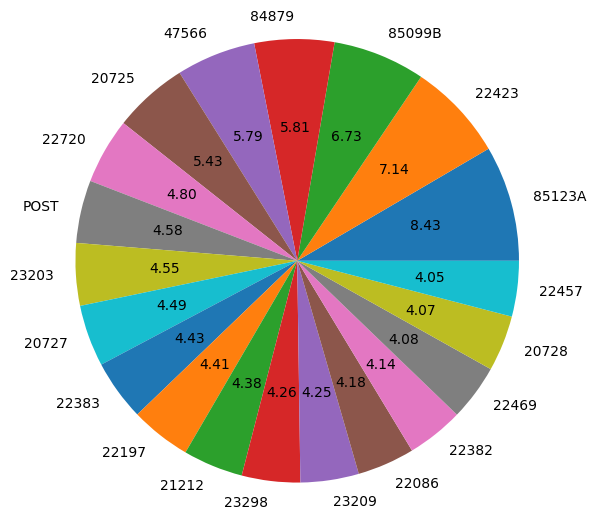

In [43]:

plt.pie(list(df['StockCode'].value_counts().head(20)),labels=list(df['StockCode'].value_counts().head(20).keys()),autopct='%.2f',radius=1.5)
plt.show()

Make new dataframe Related to product

In [44]:
L = []
stock_code = df['StockCode'].unique()
for i in stock_code:
    L.append(df[df['StockCode'] == i]['Quantity'].sum())

Stock = pd.DataFrame()
Stock['stockcode'] = stock_code
Stock['Quantity'] = L


In [45]:
Stock

,stockcode,Quantity
0,85123A,36763
1,71053,1633
2,84406B,1917
3,84029G,2465
4,84029E,3676
...,...,...
3659,90214T,12
3660,90214U,12
3661,90214W,12
3662,90214Z,12


Add some other aspects in Stock Dataframe

In [46]:
L = []
stock_code = df['StockCode'].unique()
for i in stock_code:
    if i not in L:
        L.append(df[df['StockCode'] == i]['Revenue'].sum())

Stock['revenue'] = L
Stock['revenue'] = Stock['revenue'].astype(float)
j = 0
L = []
for i in Stock['revenue']:
    #print(SR.ilmean[j,0] ,"=", (i*100)/SR['revenue'].sum())
    L.append((i*100)/Stock['revenue'].sum())
    j = j + 1
Stock['revenue_%'] = (Stock['revenue']/Stock['revenue'].sum())*100
pd.options.display.float_format = '{:,.2f}'.format

In [47]:
Stock = Stock.sort_values('revenue',ascending=False,kind='stable')
Stock.reset_index()
Stock

,stockcode,Quantity,revenue,revenue_%
528,22423,12374,"142,264.75",1.66
0,85123A,36763,"100,547.45",1.17
138,85099B,46078,"85,040.54",0.99
45,POST,3119,"69,661.21",0.81
1381,47566,15279,"68,785.23",0.80
...,...,...,...,...
2398,90104,1,0.85,0.00
2797,90084,1,0.85,0.00
1232,21268,2,0.84,0.00
2827,84227,1,0.42,0.00


In [48]:
df[df['StockCode'] == '84227']['Revenue'].sum()

0.42

In [49]:
Stock.dtypes

stockcode     object
Quantity       int64
revenue      float64
revenue_%    float64
dtype: object

Visualize Product sold quantity with revenue

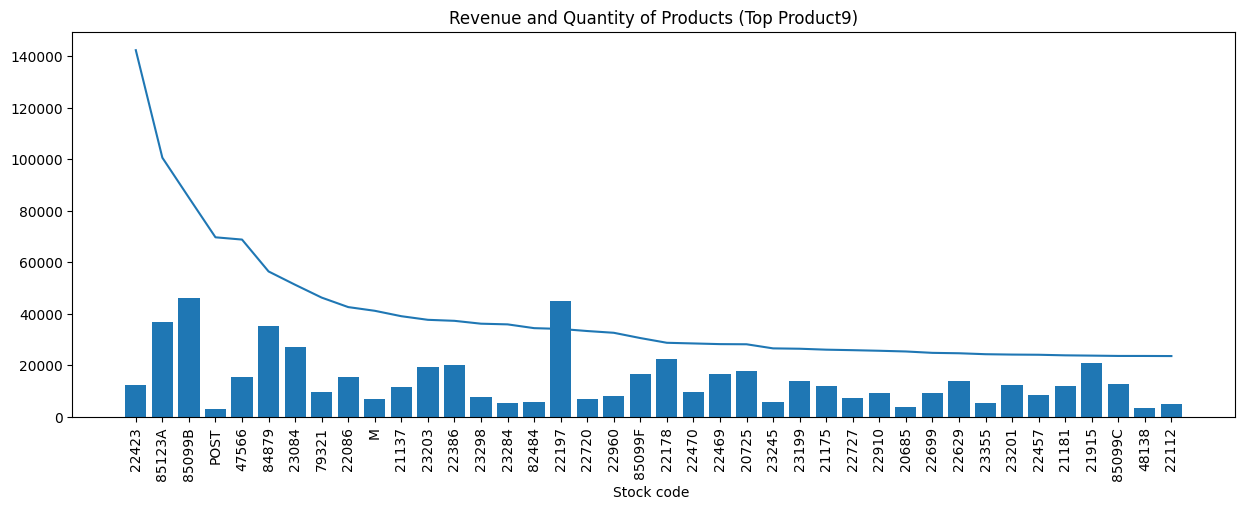

In [50]:
plt.figure(figsize=(15,5))
plt.bar(list(Stock['stockcode'].head(40)),list(Stock['Quantity'].head(40)))
plt.plot(list(Stock['stockcode'].head(40)),list(Stock['revenue'].head(40)))
plt.xlabel('Stock code ')
plt.title('Revenue and Quantity of Products (Top Product9)')
plt.xticks(rotation=90)
plt.show()

Visualize Product sold quantity with revenue

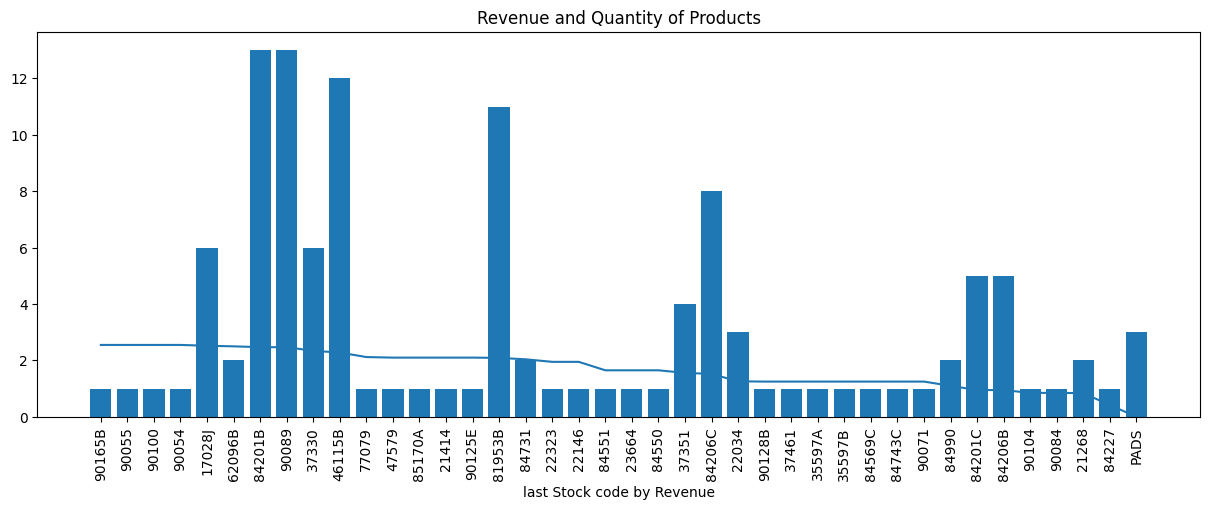

In [51]:
plt.figure(figsize=(15,5))
plt.bar(list(Stock['stockcode'].tail(40)),list(Stock['Quantity'].tail(40)))
plt.plot(list(Stock['stockcode'].tail(40)),list(Stock['revenue'].tail(40)))
plt.xlabel('last Stock code by Revenue')
plt.title('Revenue and Quantity of Products')
plt.xticks(rotation=90)
plt.show()

In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,"17,850.00",United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,"17,850.00",United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,"17,850.00",United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,"17,850.00",United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,"17,850.00",United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,"12,680.00",France,10.20,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,"12,680.00",France,12.60,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,"12,680.00",France,16.60,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,"12,680.00",France,16.60,2011-12-09,12:50:00


Chack Dataframe Validity

In [53]:
df['Revenue'].sum()

8574864.583999999

In [54]:
Stock['revenue'].sum()

8574864.584

Analysis By Time

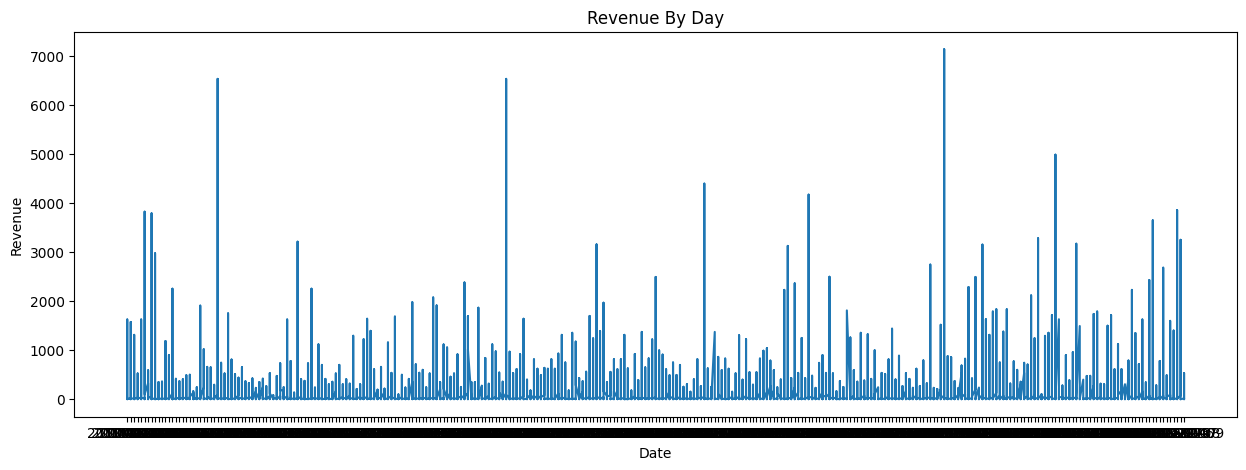

In [55]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'].values,df['Revenue'].values)
plt.title('Revenue By Day')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

Analysis By Country

In [4]:
def country(x):
    d = df[df['Country'] == x]
    d['Revenue'].sort_values()
    print('High Revenue Product = ',d[d['Revenue'] == d['Revenue'].max()]['Description'])
    print('-------------------------------------------------------------------------------------------------------------')
    print('Total Revenue = ', d['Revenue'].sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('Recurring Customer =\n',d['CustomerID'].value_counts().head(1))
    print('-------------------------------------------------------------------------------------------------------------')
    
interact(country, x = df['Country'].unique());

interactive(children=(Dropdown(description='x', options=('United Kingdom', 'France', 'Australia', 'Netherlands…